Matplotlib is building the font cache; this may take a moment.


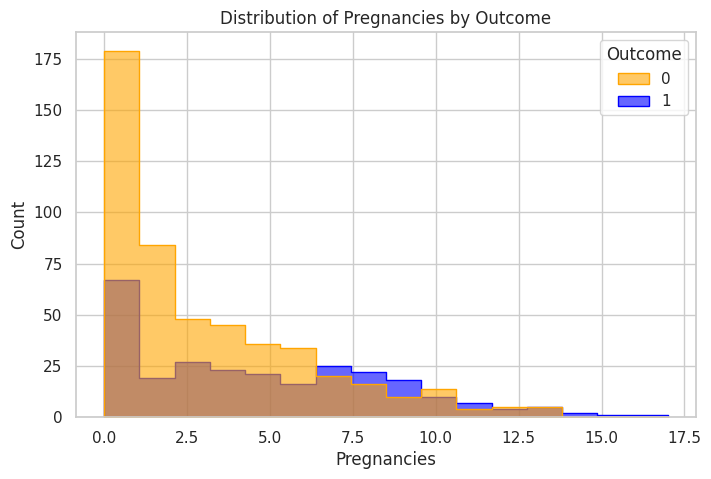

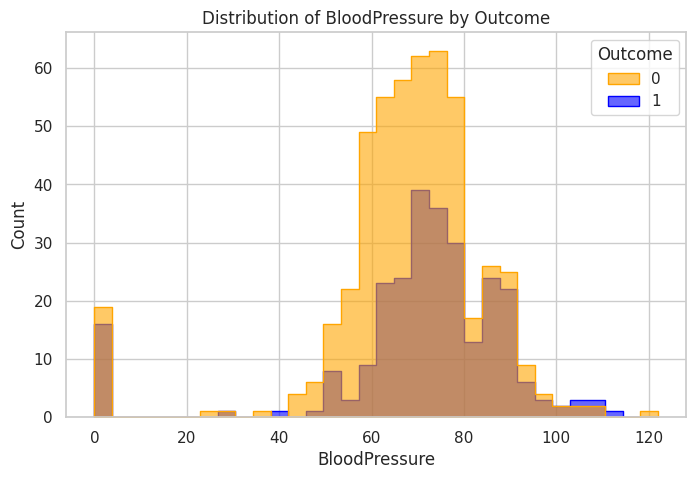

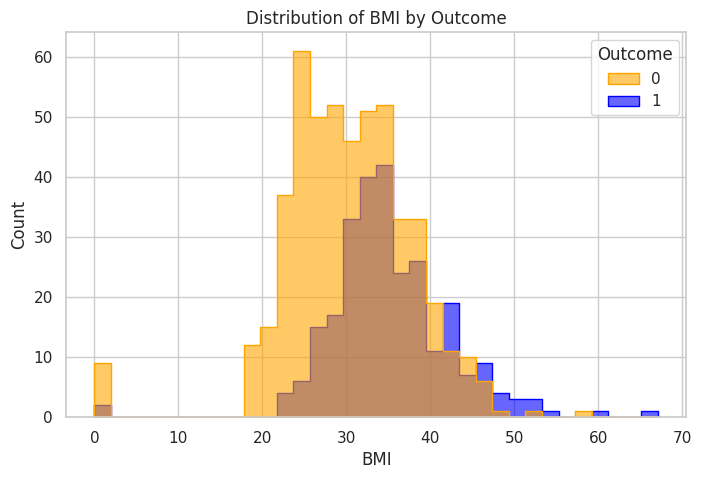

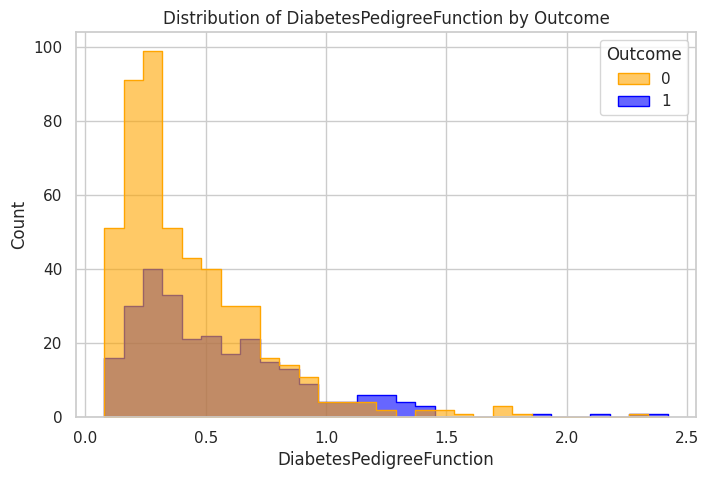

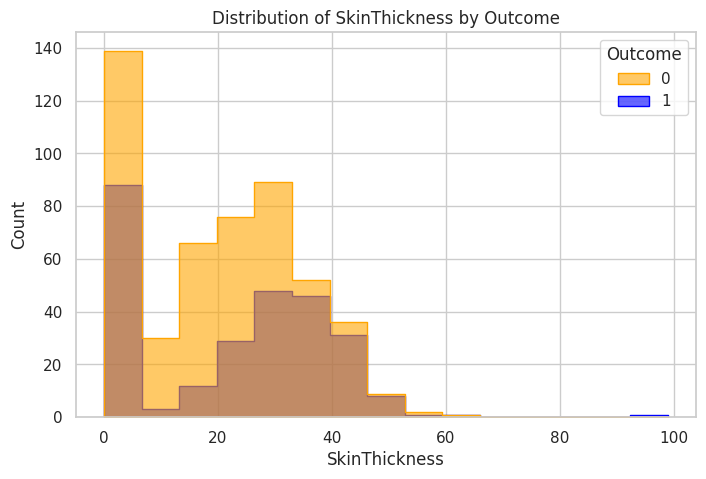

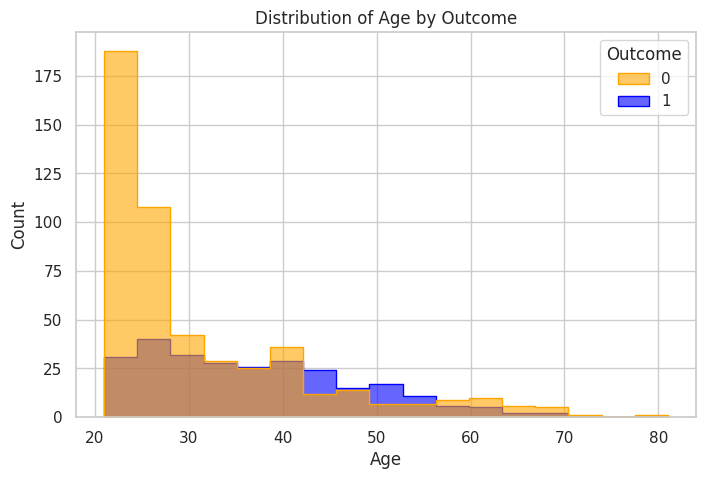

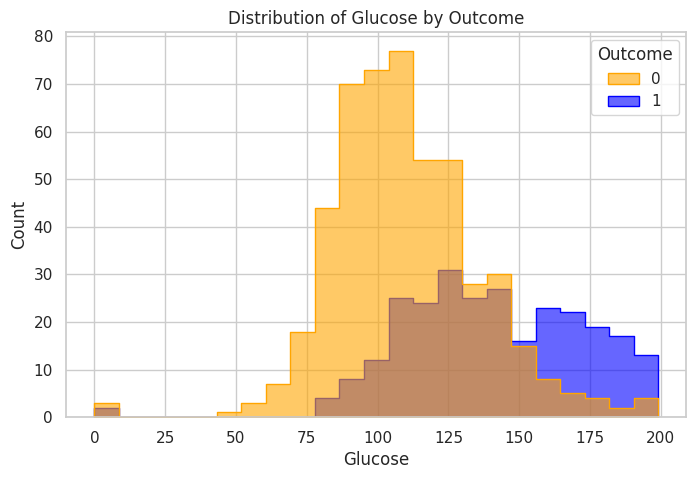

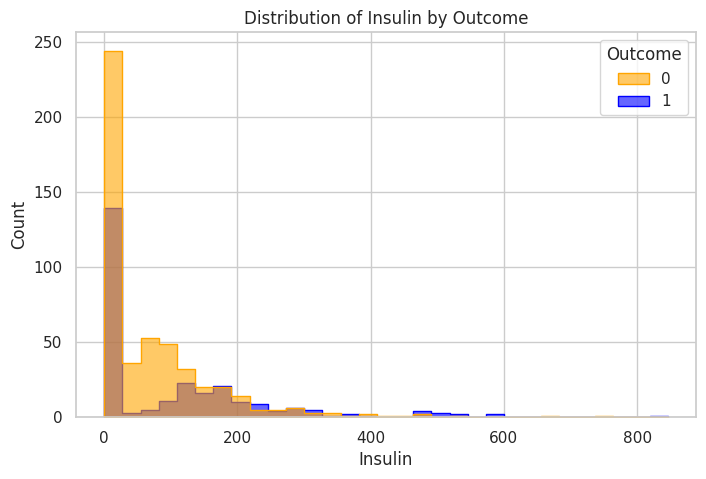

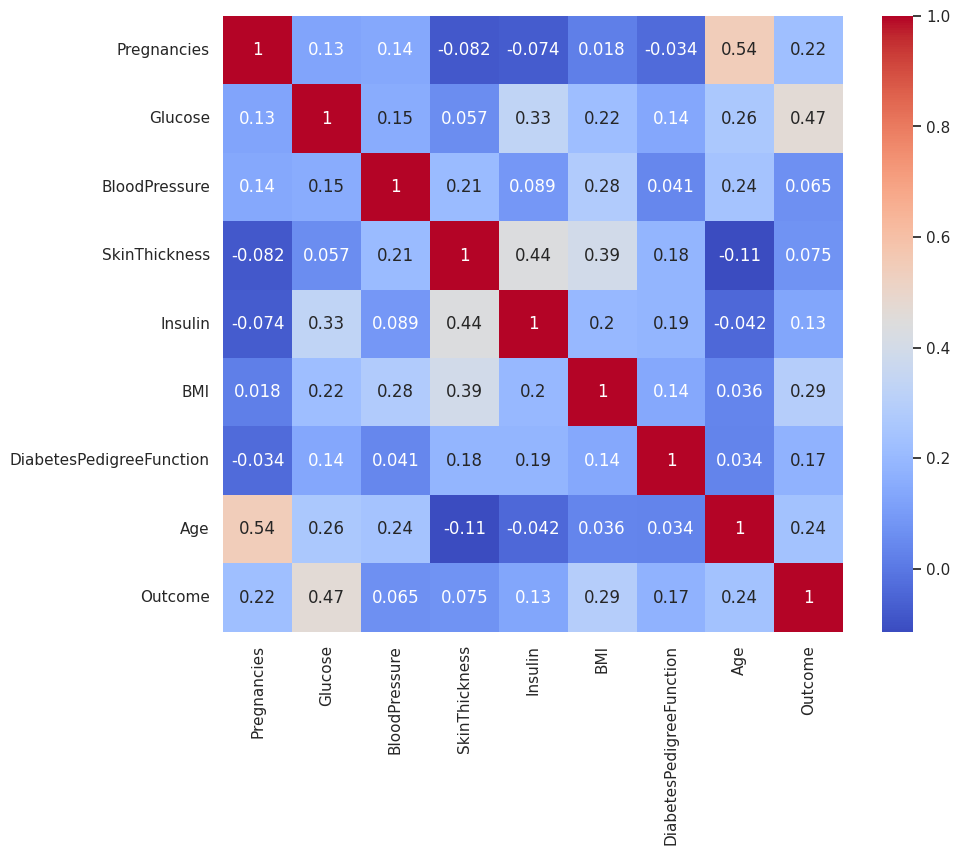

In [13]:
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install --upgrade nbformat



# Load dataset
raw_df = pd.read_csv('info.csv')

# Columns to plot
columns_to_plot = ['Pregnancies', 'BloodPressure', 'BMI', 
                    'DiabetesPedigreeFunction', 'SkinThickness', 
                    'Age', 'Glucose', 'Insulin']
sns.set(style="whitegrid")

# Plot histograms for each feature
for col in ['Pregnancies', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Age', 'Glucose', 'Insulin']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=raw_df, x=col, hue='Outcome', element='step', palette=['orange', 'blue'], alpha=0.6)
    plt.title(f'Distribution of {col} by Outcome')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(raw_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [14]:
#split the data frames into 3 
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df,test_size = 0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size = 0.25, random_state= 42)
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)
input_col = list(train_df.columns)[0:-1]
target_col = 'Outcome'
input_col
target_col




train_df.shape : (460, 9)
val_df.shape : (154, 9)
test_df.shape : (154, 9)


'Outcome'

In [15]:
train_inputs = train_df[input_col].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_col].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_col].copy()
test_targets = test_df[target_col].copy()
#Thus the data is clean
raw_df[input_col].isna().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [20]:
#scaling value
from sklearn.preprocessing import MinMaxScaler

train_inputs = train_df[input_col].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_col].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_col].copy()
test_targets = test_df[target_col].copy()
# Transform train, val, and test inputs
features = raw_df.drop(columns=["Outcome"]).columns


scaler = MinMaxScaler()

# Fit the scaler on the input features only
scaler.fit(raw_df[features])

# Apply the transformation while keeping Outcome intact
train_inputs.loc[:, features] = scaler.transform(train_inputs[features]).astype(float)
val_inputs.loc[:, features] = scaler.transform(val_inputs[features]).astype(float)
test_inputs.loc[:, features] = scaler.transform(test_inputs[features]).astype(float)




<ipython-input-20-2f6e10bdef57>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.         0.05882353 0.52941176 0.         0.35294118
 0.47058824 0.         0.11764706 0.         0.29411765 0.05882353
 0.11764706 0.17647059 0.         0.11764706 0.05882353 0.35294118
 0.11764706 0.11764706 0.05882353 0.23529412 0.11764706 0.11764706
 0.05882353 0.23529412 0.29411765 0.23529412 0.41176471 0.
 0.47058824 0.11764706 0.58823529 0.41176471 0.35294118 0.29411765
 0.17647059 0.05882353 0.41176471 0.11764706 0.64705882 0.05882353
 0.52941176 0.35294118 0.17647059 0.29411765 0.         0.29411765
 0.70588235 0.70588235 0.23529412 0.29411765 0.05882353 0.05882353
 0.47058824 0.05882353 0.         0.         0.23529412 0.35294118
 0.05882353 0.35294118 0.41176471 0.         0.41176471 0.05882353
 0.05882353 0.29411765 0.17647059 0.35294118 0.         0.05882353
 0.64705882 0.         0.05882353 0.29411765 0.705

In [21]:
train_inputs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
335,0.000000,0.829146,0.622951,0.434343,0.301418,0.713860,0.077284,0.083333
467,0.000000,0.487437,0.524590,0.363636,0.118203,0.548435,0.222886,0.066667
51,0.058824,0.507538,0.409836,0.151515,0.042553,0.360656,0.191289,0.083333
131,0.529412,0.613065,0.459016,0.000000,0.000000,0.496274,0.442357,0.200000
649,0.000000,0.537688,0.491803,0.252525,0.000000,0.393443,0.023484,0.033333
...,...,...,...,...,...,...,...,...
703,0.117647,0.648241,0.000000,0.000000,0.000000,0.573770,0.096499,0.333333
412,0.058824,0.718593,0.688525,0.232323,0.366430,0.631893,0.426132,0.016667
38,0.117647,0.452261,0.557377,0.424242,0.000000,0.569300,0.181469,0.100000
386,0.294118,0.582915,0.606557,0.292929,0.000000,0.481371,0.248506,0.233333


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(train_inputs, train_targets)

LogisticRegression(solver='liblinear')

In [26]:
X_train = train_inputs
X_val = val_inputs
X_test = test_inputs
train_preds = model.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)



0.7434782608695653

Accuracy: 74.35%
Accuracy: 73.38%
Accuracy: 74.03%


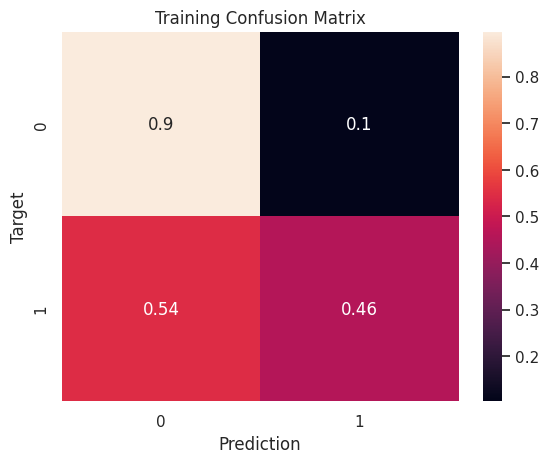

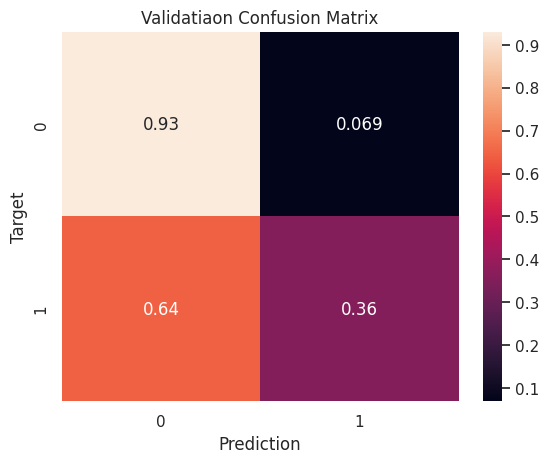

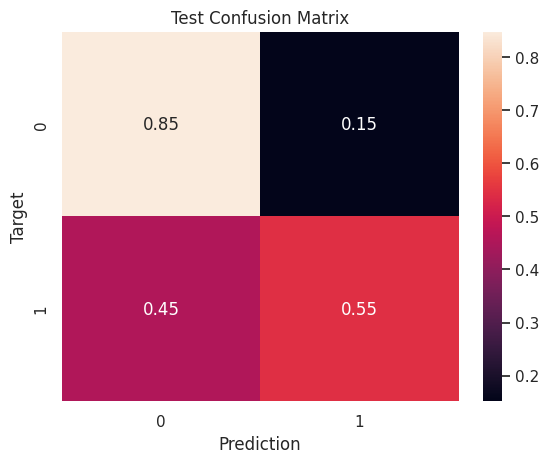

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize='true')
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds
train_preds = predict_and_plot(X_train, train_targets, 'Training')
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')
test_preds = predict_and_plot(X_test, test_targets, 'Test')